In [2]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

C:\Users\kater\AppData\Local\Temp\ipykernel_7688\2022566465.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [94]:
## Getting train data

titanic_train = pd.read_csv('train_6.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
titanic_train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PREPROCESSING

In [55]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
## Data Cleaning
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
## To identify rows in the DataFrame where at least one value is missing (NaN/null) across any column
titanic_train[titanic_train.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [58]:
## to correct missing values REMOVING NULL VALUES
# Drop rows with missing values in Age, Embarked and Cabin columns
titanic_train = titanic_train.dropna(subset=['Age', 'Embarked', 'Cabin'])


In [92]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,1,38.0,1,0,71.2833,2,1
3,4,1,1,1,35.0,1,0,53.1000,2,0
6,7,0,1,0,54.0,0,0,51.8625,4,0
10,11,1,3,1,4.0,1,1,16.7000,6,0
11,12,1,1,1,58.0,0,0,26.5500,2,0


In [61]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
## How many types of diffenent valies in each column
unique_values = titanic_train.nunique()
print(unique_values)


PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64


In [63]:
## Checking for the actual values in the columns
unique_values = titanic_train.apply(lambda x: x.unique())
print(unique_values)


PassengerId    [2, 4, 7, 11, 12, 22, 24, 28, 53, 55, 63, 67, ...
Survived                                                  [1, 0]
Pclass                                                 [1, 3, 2]
Name           [Cumings, Mrs. John Bradley (Florence Briggs T...
Sex                                               [female, male]
Age            [38.0, 35.0, 54.0, 4.0, 58.0, 34.0, 28.0, 19.0...
SibSp                                               [1, 0, 3, 2]
Parch                                               [0, 1, 2, 4]
Ticket         [PC 17599, 113803, 17463, PP 9549, 113783, 248...
Fare           [71.2833, 53.1, 51.8625, 16.7, 26.55, 13.0, 35...
Cabin          [C85, C123, E46, G6, C103, D56, A6, C23 C25 C2...
Embarked                                               [C, S, Q]
dtype: object


In [64]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:

# Remove the 'Name' and 'Ticket' columns
titanic_train.drop(['Name', 'Ticket'], axis=1, inplace=True)


C:\Users\kater\AppData\Local\Temp\ipykernel_7688\1034433191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [66]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

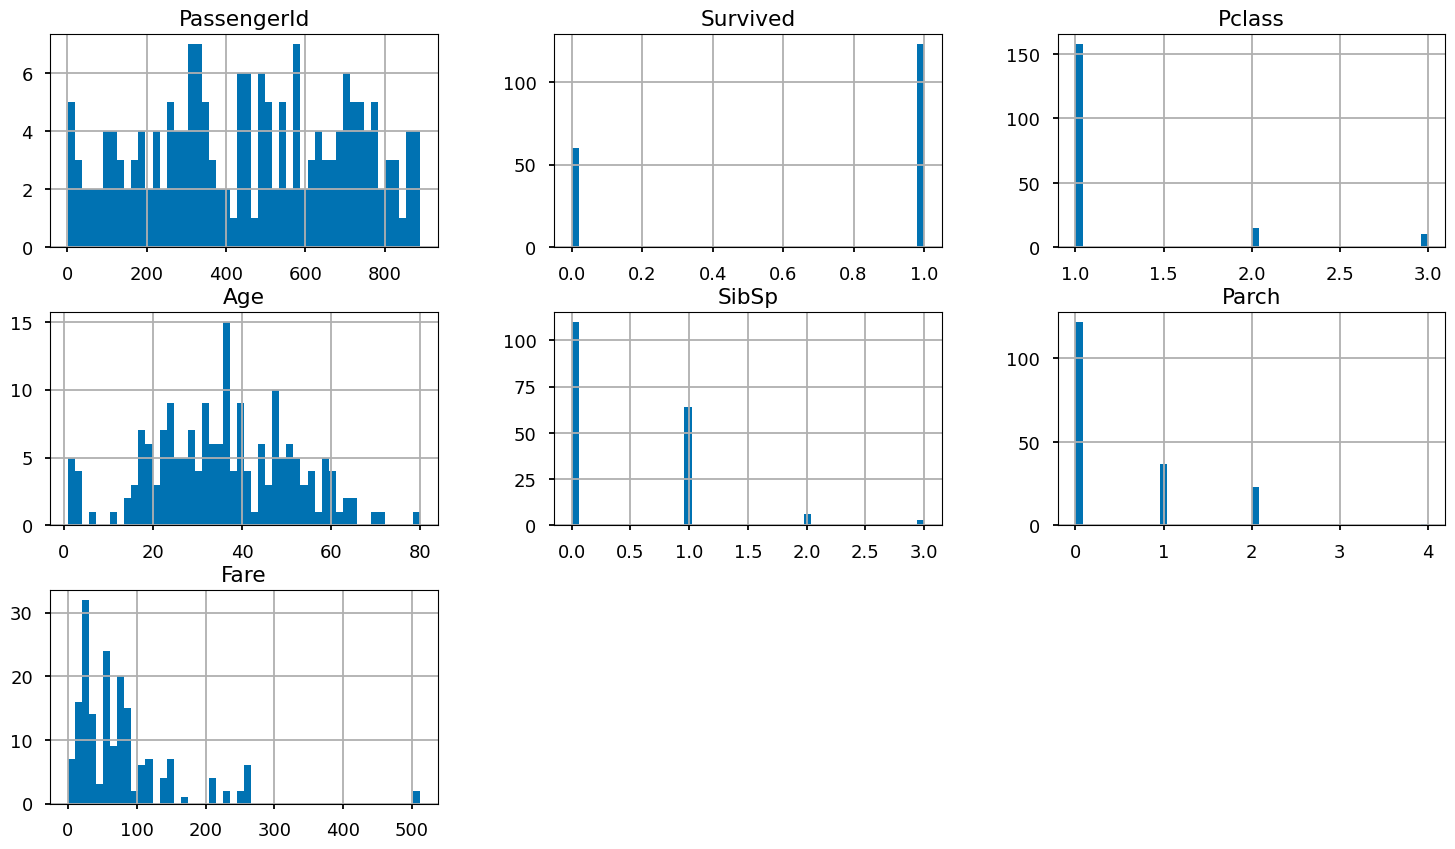

In [32]:
## Histogram for all features

# for papers
plt.style.use('seaborn-v0_8-paper')
# for presentations
plt.style.use('seaborn-v0_8-talk')
# for papers with colors distinguishable by colorblind people
plt.style.use('seaborn-v0_8-colorblind')
# HACK: for presentations with colors distinguishable by colorblind people
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-talk'])

# Your histogram plotting code here
titanic_train.hist(bins=50, figsize=(18, 10))

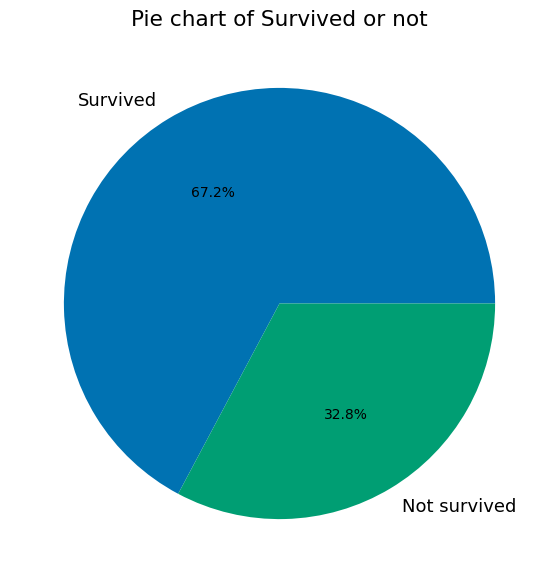

In [75]:
##Pie chart in percentage Survived vs not
percentage = titanic_train['Survived'].value_counts(normalize=True)*100
classlabels =['Survived','Not survived']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels= classlabels, autopct='%1.1f%%')
plt.title('Pie chart of Survived or not')
plt.show()


In [69]:
##### ENCODING!!!!!
# Encode categorical variables. Mapping 'Sex' and 'Embarked' into numerical
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\kater\AppData\Local\Temp\ipykernel_7688\3198350889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
C:\Users\kater\AppData\Local\Temp\ipykernel_7688\3198350889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [70]:

# Feature Engineering - Cabin
##titanic_train['Deck'] = titanic_train['Cabin'].str[:1]  # Extract first letter of Cabin to get the deck

## use .astype(str) to convert the 'Cabin' column to strings, ensuring that all values are treated as strings.
# Convert 'Cabin' column to strings and extract the first character
# Then, we use .str[0] to extract the first character from each string in the 'Cabin' column.
titanic_train['Cabin'] = titanic_train['Cabin'].astype(str).str[0]

## we map the extracted first characters to numerical values using the cabin_mapping dictionary.
# Map the first character of 'Cabin' to numerical values
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
titanic_train['Cabin'] = titanic_train['Cabin'].map(cabin_mapping)

C:\Users\kater\AppData\Local\Temp\ipykernel_7688\1147428529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Cabin'] = titanic_train['Cabin'].astype(str).str[0]
C:\Users\kater\AppData\Local\Temp\ipykernel_7688\1147428529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Cabin'] = titanic_train['Cabin'].map(cabin_mapping)


In [71]:
## Check for dtypes
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    int64  
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Fare         183 non-null    float64
 8   Cabin        183 non-null    int64  
 9   Embarked     183 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 15.7 KB


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.148495 -0.089136  0.025205  0.030933 -0.083488   
Survived        0.148495  1.000000 -0.034542  0.532418 -0.254085  0.106346   
Pclass         -0.089136 -0.034542  1.000000  0.046181 -0.306514 -0.103592   
Sex             0.025205  0.532418  0.046181  1.000000 -0.184969  0.104291   
Age             0.030933 -0.254085 -0.306514 -0.184969  1.000000 -0.156162   
SibSp          -0.083488  0.106346 -0.103592  0.104291 -0.156162  1.000000   
Parch          -0.051454  0.023582  0.047496  0.089581 -0.271271  0.255346   
Fare            0.029740  0.134241 -0.315235  0.130433 -0.092424  0.286433   
Cabin          -0.105345 -0.019181  0.585683  0.055648 -0.170110  0.016005   
Embarked       -0.054246  0.083231 -0.235027  0.060862  0.088112  0.015962   

                Parch      Fare     Cabin  Embarked  
PassengerId -0.051454  0.029740 -0.105345 -0.054246  
Survived     0.023582  0.134241 -

<Axes: >

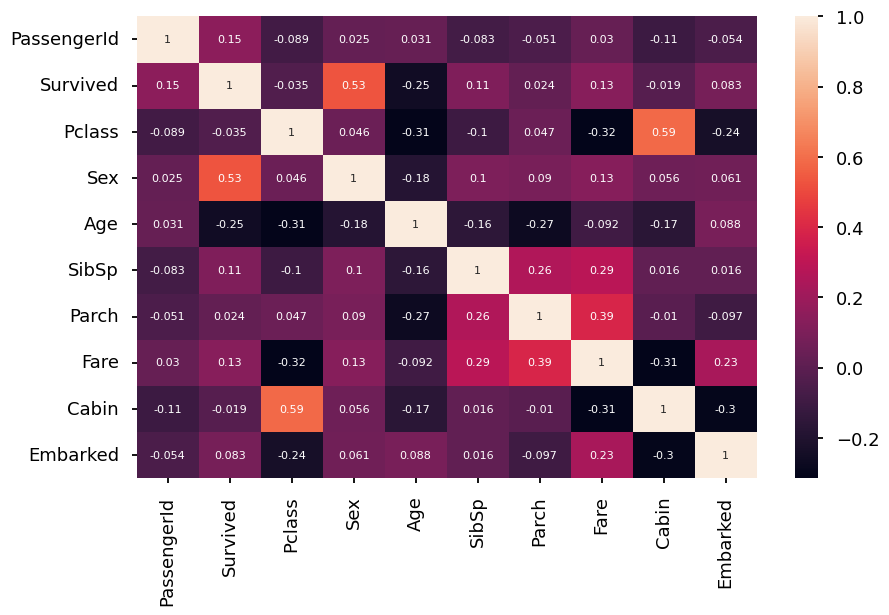

In [74]:
## Correlation
# Calculate the correlation matrix
corr_matrix = titanic_train.corr()

print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(titanic_train.corr(), annot=True, annot_kws={'size': 8})

<Figure size 300x100 with 0 Axes>

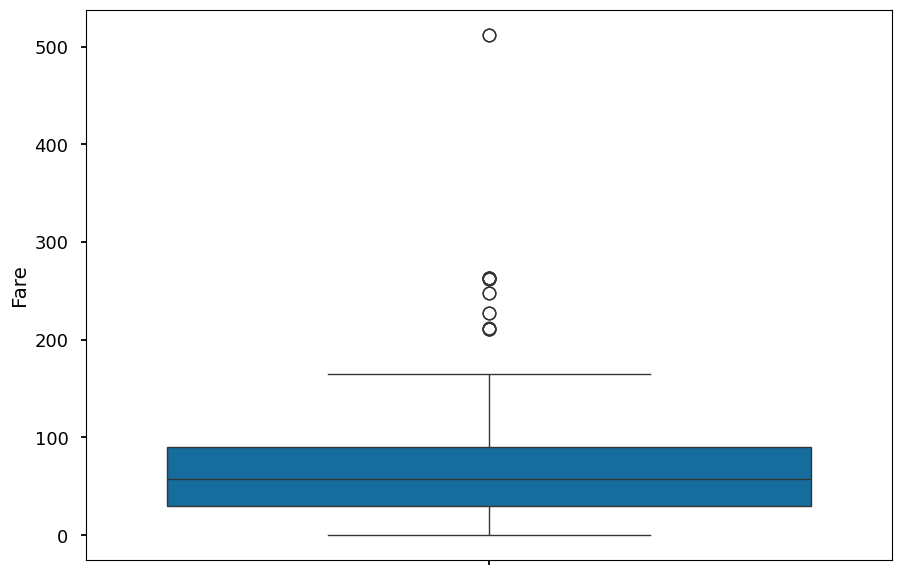

<Figure size 300x100 with 0 Axes>

In [86]:
## Outliers in Fare
sns.boxplot(titanic_train['Fare'])
plt.figure(figsize=(3, 1))

<Figure size 300x100 with 0 Axes>

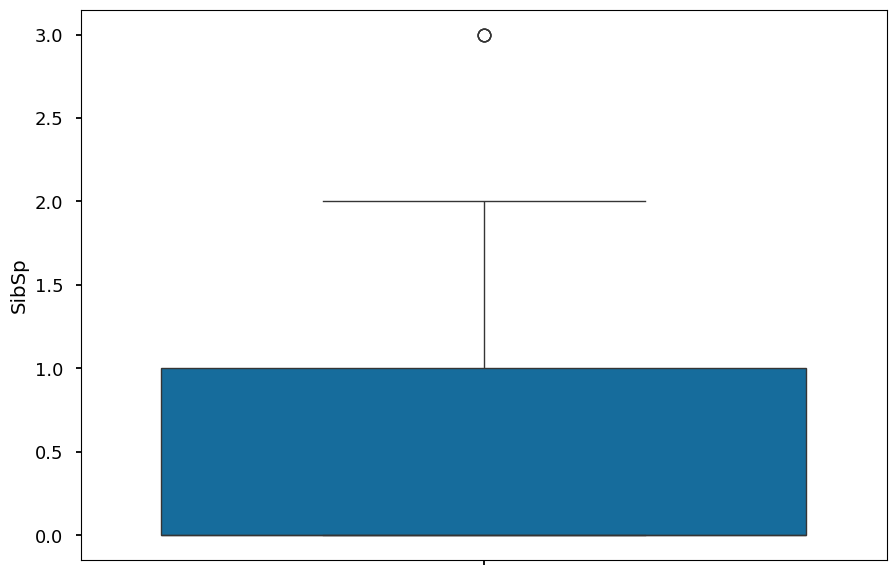

<Figure size 300x100 with 0 Axes>

In [87]:
sns.boxplot(titanic_train['SibSp'])
plt.figure(figsize=(3, 1))

<Figure size 1000x600 with 0 Axes>

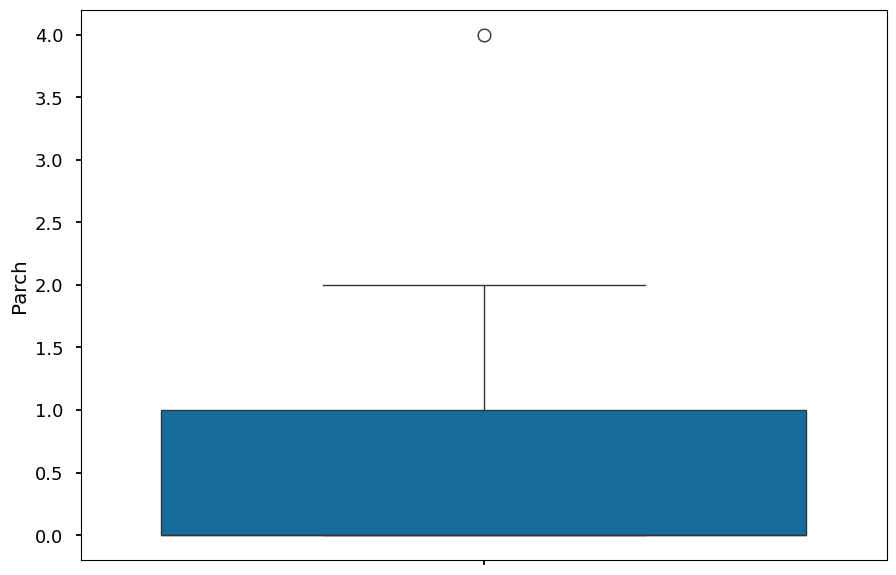

<Figure size 1000x600 with 0 Axes>

In [90]:
sns.boxplot(titanic_train['Parch'])
plt.figure(figsize=(10, 6))

In [ ]:
#######################################################################################################

# Load the dataset
titanic_train = pd.read_csv('titanic_train.csv')

# Feature Engineering - Cabin
titanic_train['Deck'] = titanic_train['Cabin'].str[:1]  # Extract first letter of Cabin to get the deck
titanic_train['Deck'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'

# Feature Engineering - Ticket
titanic_train['Ticket_Prefix'] = titanic_train['Ticket'].str.split().str[0]  # Extract ticket prefix

# Select categorical features to encode
categorical_features = ['Deck', 'Ticket_Prefix']

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # drop the first column to avoid multicollinearity
encoded_features = encoder.fit_transform(titanic_train[categorical_features])

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(categorical_features))

# Concatenate encoded features with original DataFrame and drop original categorical columns
titanic_train_encoded = pd.concat([titanic_train.drop(columns=categorical_features), encoded_df], axis=1)

# Display the resulting DataFrame
print(titanic_train_encoded)


In [ ]:
#############################################################################################

# Step 1: Load the dataset
titanic_train = pd.read_csv('titanic_train.csv')

# Step 2: Handle Missing Values
imputer = SimpleImputer(strategy='median')
titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

# Step 3: Feature Engineering (Example: Extract titles from 'Name' column)
titanic_train['Title'] = titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Step 4: Encode Categorical Variables
categorical_features = ['Sex', 'Embarked', 'Title']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 5: Feature Scaling
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Step 6: Split Data into Training and Testing Sets
X = titanic_train[categorical_features + numerical_features]
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Run Logistic Regression
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)





In [81]:
# Perform one-hot encoding for Cabin Column
titanic_train = pd.get_dummies(titanic_train, columns=['Cabin'], prefix='Cabin')


In [84]:
# Perform one-hot encoding for Tickets Column
titanic_train = pd.get_dummies(titanic_train, columns=[Ticket'], prefix='Ticket')

SyntaxError: unterminated string literal (detected at line 2) (565102122.py, line 2)

In [83]:
# Encode categorical variables
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

## use .astype(str) to convert the 'Cabin' column to strings, ensuring that all values are treated as strings.
# Convert 'Cabin' column to strings and extract the first character
# Then, we use .str[0] to extract the first character from each string in the 'Cabin' column.
###titanic_train['Cabin'] = titanic_train['Cabin'].astype(str).str[0]

## we map the extracted first characters to numerical values using the cabin_mapping dictionary.
# Map the first character of 'Cabin' to numerical values
###cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
###titanic_train['Cabin'] = titanic_train['Cabin'].map(cabin_mapping)

In [ ]:
# Perform one-hot encoding......................................................................................................................................................
titanic_train = pd.get_dummies(titanic_train, columns=['Cabin'], prefix='Cabin')

# Perform logistic regression using your chosen library (e.g., scikit-learn)


# Prepare the features and target
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Evaluate the model using your chosen method (e.g., cross-validation)
# ...

C:\Users\kater\AppData\Local\Temp\ipykernel_4128\1345267172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
C:\Users\kater\AppData\Local\Temp\ipykernel_4128\1345267172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
C:\Users\kater\AppData\Local\Temp\ipykernel_4128\1345267172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [ ]:
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,4,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,2,0


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.480874,35.674426,0.464481,0.475410,78.682469,2.426230,0.377049
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843,1.476471,0.508086
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000,1.000000,0.000000
50%,457.000000,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,57.000000,2.000000,0.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,3.500000,1.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,7.000000,2.000000


In [ ]:
## Save the new cleaned data. ## index= False means the first column 0123346... will not be saved
titanic_train.to_csv('titanic_train_cleaned_dataset.csv', index = False)

EDA - EXPLORATORY DATA ANALYSIS

In [ ]:
# Encode categorical variables
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic_train['Cabin'] = titanic_train['Cabin'].str[0]
titanic_train['Cabin'] = titanic_train['Cabin'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})

C:\Users\kater\AppData\Local\Temp\ipykernel_4128\3640394063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})
C:\Users\kater\AppData\Local\Temp\ipykernel_4128\3640394063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Embarked'] = titanic_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


AttributeError: Can only use .str accessor with string values!

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    int64  
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    int64  
 11  Embarked     183 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 18.6+ KB


In [ ]:
##  Change the required columns, all in this case, as integer
titanic_train[['PassengerId','Survived','Pclass','Name','Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]=titanic_train[['PassengerId','Survived','Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].astype(int)

ValueError: invalid literal for int() with base 10: 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [ ]:
# Check for missing values###############################################################################################
print(df.isnull().sum())

# Drop rows with missing values in Age, Embarked and Cabin columns
df = df.dropna(subset=['Age', 'Embarked', 'Cabin'])

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'] = df['Cabin'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})

# Split the dataset into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{confusion}')
print(f'Classification Report: \n{report}')

# Visualize the results (optional)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

sns.countplot(x=y, palette='Set2')
plt.title('Target Class Distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X['Sex'] = le.fit_transform(X['Sex'])

In [ ]:
X['Embarked'] = le.fit_transform(X['Embarked'])